In [6]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import librosa
import IPython.display
import librosa.display
import os
import random
from matplotlib.pyplot import specgram
import glob

In [7]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    np.nan_to_num(X)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    return mfccs, chroma, mel, contrast, tonnetz


def parse_audio_files(parent_dir, sub_dirs, classes, file_ext='*.wav'):
    features, labels = np.empty((0, 193)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            features = np.vstack([features,ext_features])
            labels = np.append(labels, classes.get(sub_dir))
    return np.array(features), np.array(labels, dtype = np.int)


def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [8]:

train_dir = '/mnt/4dd2488f-d1c5-4d59-85f0-86b7c7057817/SPEAKER_MIMICRY/VS_CODE_IMPLI/Train_tsk_02'
test_dir = '/mnt/4dd2488f-d1c5-4d59-85f0-86b7c7057817/SPEAKER_MIMICRY/VS_CODE_IMPLI/Test_tsk_02'

os.listdir(train_dir)


['nm', 'pm', 'VS', 'Mala']

In [9]:
os.listdir(test_dir)

['nm', 'pm', 'VS', 'Mala']

In [10]:

sub_dirs = ['nm', 'pm', 'VS', 'Mala']
classes = {'nm': 0, 'pm': 1, 'VS': 2, 'Mala': 3}
features1, labels1 = parse_audio_files(train_dir, sub_dirs, classes)

/tmp/ipykernel_29035/2441616808.py:7: FutureWarning: Pass y=[ 8.0192411e-05 -2.1533678e-04 -4.2327435e-04 ... -3.7651455e-03
 -4.8132185e-03 -2.3233504e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/tmp/ipykernel_29035/2441616808.py:7: FutureWarning: Pass y=[-0.00643864 -0.00676405 -0.00463421 ...  0.02510195  0.02140986
  0.0250639 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/tmp/ipykernel_29035/2441616808.py:7: FutureWarning: Pass y=[ 0.00374938  0.00595315  0.00774857 ... -0.28290266 -0.26409227
 -0.27941763] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/tmp/ipykernel_29035/2441616808.py:7: FutureWa

In [12]:
labels1


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3])

In [13]:
one_hot = one_hot_encode(labels1)

In [14]:
one_hot

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [19]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(features1, one_hot, test_size=0.1, random_state = 127)

In [20]:
X_train.shape

(29, 193)

In [21]:
y_train.shape

(29, 4)

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout


2022-12-27 20:41:53.763521: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-27 20:41:54.195600: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-27 20:41:54.195639: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-27 20:41:55.525616: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [23]:
num_labels = one_hot.shape[1]
filter_size = 4

def build_model_graph(input_shape=(40,)):
    model = Sequential()
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_labels))
    model.add(Activation('sigmoid'))
    # Compile the model
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

model = build_model_graph()

2022-12-27 20:41:58.018151: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-27 20:41:58.018184: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-27 20:41:58.018207: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cruz-Predator-PH315-51): /proc/driver/nvidia/version does not exist
2022-12-27 20:41:58.018462: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 100
num_batch_size = 32
checkpointer = ModelCheckpoint(filepath="dnnfdp.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [25]:
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test),callbacks=[checkpointer])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 23.8318 - accuracy: 0.2069
Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to dnnfdp.hdf5
1/1 [==============================] - 1s 1s/step - loss: 23.8318 - accuracy: 0.2069 - val_loss: 5.9117 - val_accuracy: 0.2500
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 26.0210 - accuracy: 0.3103
Epoch 2: val_accuracy did not improve from 0.25000
1/1 [==============================] - 0s 47ms/step - loss: 26.0210 - accuracy: 0.3103 - val_loss: 7.0335 - val_accuracy: 0.2500
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 29.4770 - accuracy: 0.2414
Epoch 3: val_accuracy did not improve from 0.25000
1/1 [==============================] - 0s 46ms/step - loss: 29.4770 - accuracy: 0.2414 - val_loss: 9.1785 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 17.6898 - accuracy: 0.3793
Epoch 4: val_accuracy did not improve from 0.25000
1

In [26]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))

Training Accuracy: 100.00%


In [27]:
sub_dirs = ['nm', 'pm', 'VS', 'Mala']
classes = {'nm': 0, 'pm': 1, 'VS': 2, 'Mala': 3}
features, labels = parse_audio_files(test_dir, sub_dirs, classes)

/tmp/ipykernel_29035/2441616808.py:7: FutureWarning: Pass y=[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -9.254414e-07  2.067170e-06
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/tmp/ipykernel_29035/2441616808.py:7: FutureWarning: Pass y=[-0.00119755 -0.00084924 -0.00064206 ...  0.00080524  0.00048259
  0.0002059 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/tmp/ipykernel_29035/2441616808.py:7: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00047063 -0.00054746
 -0.00040489] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
/tmp/ipykernel_29035/2441616808.py:7: FutureWarning:

In [28]:
features

array([[-5.85496521e+02,  7.05440826e+01, -8.69348049e+00, ...,
         1.53890626e-02,  5.34147028e-02, -5.91246754e-02],
       [-4.03394623e+02,  1.18806412e+02, -3.02552605e+01, ...,
        -3.33223307e-02, -7.13518584e-04,  1.17023634e-02],
       [-2.10548889e+02,  8.95357056e+01, -1.60869007e+01, ...,
        -8.04908113e-03,  4.00257375e-04, -4.36154907e-03],
       ...,
       [-3.58777191e+02,  1.03966736e+02, -3.27147484e+00, ...,
         6.30983289e-02,  1.09606349e-02, -2.65028507e-02],
       [-2.65419373e+02,  8.49839859e+01, -1.28896999e+01, ...,
         2.38555490e-03,  5.11086843e-03,  1.81329763e-03],
       [-4.45652344e+02,  9.34927368e+01, -8.49128342e+00, ...,
         4.73379586e-03,  5.81958999e-03, -5.17249304e-03]])

In [29]:
labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3])

In [30]:
X1 = features
y1 = labels
# print(X1)
print(len(X1))

ynew = model.predict(X1)
# show the inputs and predicted probabilities
pred_label = []
original=[]
for i in range(len(X1)):
  Predicted=ynew[i]
  # print(Predicted)
  # # print("X=%s,\n Predicted=%s" % (X1[i], ynew[i]))
  pred_final1 = np.argmax(Predicted)
  pred_label.append(pred_final1)
  y1 = labels

print(labels)
print(pred_label)

26
1/1 [==============================] - 0s 108ms/step
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3]
[2, 2, 0, 0, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 1, 0, 2]


In [32]:
labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3])

<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

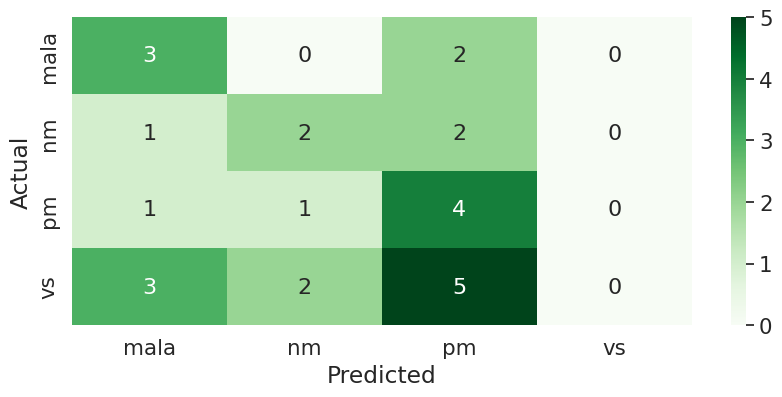

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

y_label = ["vs", "mala", "pm","nm"]

cm=confusion_matrix(labels,pred_label)
df_cm = pd.DataFrame(cm, columns=np.unique(y_label), index = np.unique(y_label))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Greens", annot=True,annot_kws={"size": 16})# font size

In [34]:
TP = np.diag(cm)
# print(TP)
FP = np.sum(cm, axis=0) - TP
# print(FP)
FN = np.sum(cm, axis=1) - TP
# print(FN)
num_classes = 4
TN = []
for i in range(num_classes):
    temp = np.delete(cm, i, 0)    # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TN.append(sum(sum(temp)))
# print(TN)
# l = 10000
# total
# for i in range(num_classes):
#     print(TP[i] + FP[i] + FN[i] + TN[i])
precision = TP/(TP+FP)
print(precision)
recall = TP/(TP+FN)
print(recall)
# specificity = TN/(TN+FP)
# print(specificity)
F1score= 2*((precision*recall)/(precision+recall))
print(F1score)
test_accuracy = (TP + TN) / (TP + TN + FP + FN)
print(test_accuracy)

[0.375      0.4        0.30769231        nan]
[0.6        0.4        0.66666667 0.        ]
[0.46153846 0.4        0.42105263        nan]
[0.73076923 0.76923077 0.57692308 0.61538462]


/tmp/ipykernel_29035/1529887052.py:18: RuntimeWarning: invalid value encountered in divide
  precision = TP/(TP+FP)
